In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [590]:
from scipy.stats import skew, expon, uniform, reciprocal, boxcox
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.pipeline import make_pipeline, make_union
from sklearn.model_selection import KFold, train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV, LeaveOneOut
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold, SelectFromModel
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.cross_decomposition import PLSRegression, PLSCanonical
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

from sklearn_pandas import gen_features, DataFrameMapper

In [96]:
def print_r2_rmse(y_true, y_pred):
    print("R2: {:.4f}, RMSE: {:.4f}".format(r2_score(y_true, y_pred), 
                                            np.sqrt(mean_squared_error(y_true, y_pred))))


### Ex 6.1: tecator

In [27]:
absorp = pd.read_csv('data/tecator/absorp.csv', index_col=0)
endpoint = pd.read_csv('data/tecator/endpoints.csv', index_col=0)

endpoint.columns = ['water', 'fat', 'protein']
absorp.columns = 'F' + absorp.columns.astype(str)

In [28]:
absorp.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F90,F91,F92,F93,F94,F95,F96,F97,F98,F99
1.0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,3.00247,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920
2.0,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.30473,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942
3.0,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.70934,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816
4.0,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.99820,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622
5.0,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.32201,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753


In [29]:
endpoint.head()

,water,fat,protein
1.0,60.5,22.5,16.7
2.0,46.0,40.1,13.5
3.0,71.0,8.4,20.5
4.0,72.8,5.9,20.7
5.0,58.3,25.5,15.5


In [30]:
absorp.shape, endpoint.shape

((215, 100), (215, 3))

In [32]:
absorp.describe().T

,count,mean,std,min,25%,50%,75%,max
F0,215.0,2.808561,0.410793,2.06642,2.512265,2.75360,3.006155,4.23728
F1,215.0,2.811137,0.413352,2.06583,2.513260,2.75518,3.010470,4.24721
F2,215.0,2.813727,0.415906,2.06518,2.514210,2.75668,3.014840,4.25737
F3,215.0,2.816363,0.418465,2.06465,2.515330,2.75824,3.019260,4.26773
F4,215.0,2.819098,0.421040,2.06417,2.516775,2.75986,3.025895,4.27847
F5,215.0,2.821983,0.423635,2.06373,2.518240,2.76161,3.032780,4.28968
F6,215.0,2.825064,0.426245,2.06340,2.518305,2.76355,3.039780,4.30133
F7,215.0,2.828375,0.428866,2.06314,2.518605,2.76568,3.046930,4.31331
F8,215.0,2.831943,0.431510,2.06301,2.519185,2.76866,3.054310,4.32587
F9,215.0,2.835813,0.434195,2.06317,2.521480,2.77072,3.061875,4.33927


In [35]:
skewness = absorp.apply(skew)
skewness.describe()

count    100.000000
mean       0.909066
std        0.062523
min        0.831778
25%        0.849134
50%        0.900843
75%        0.973449
max        1.004629
dtype: float64

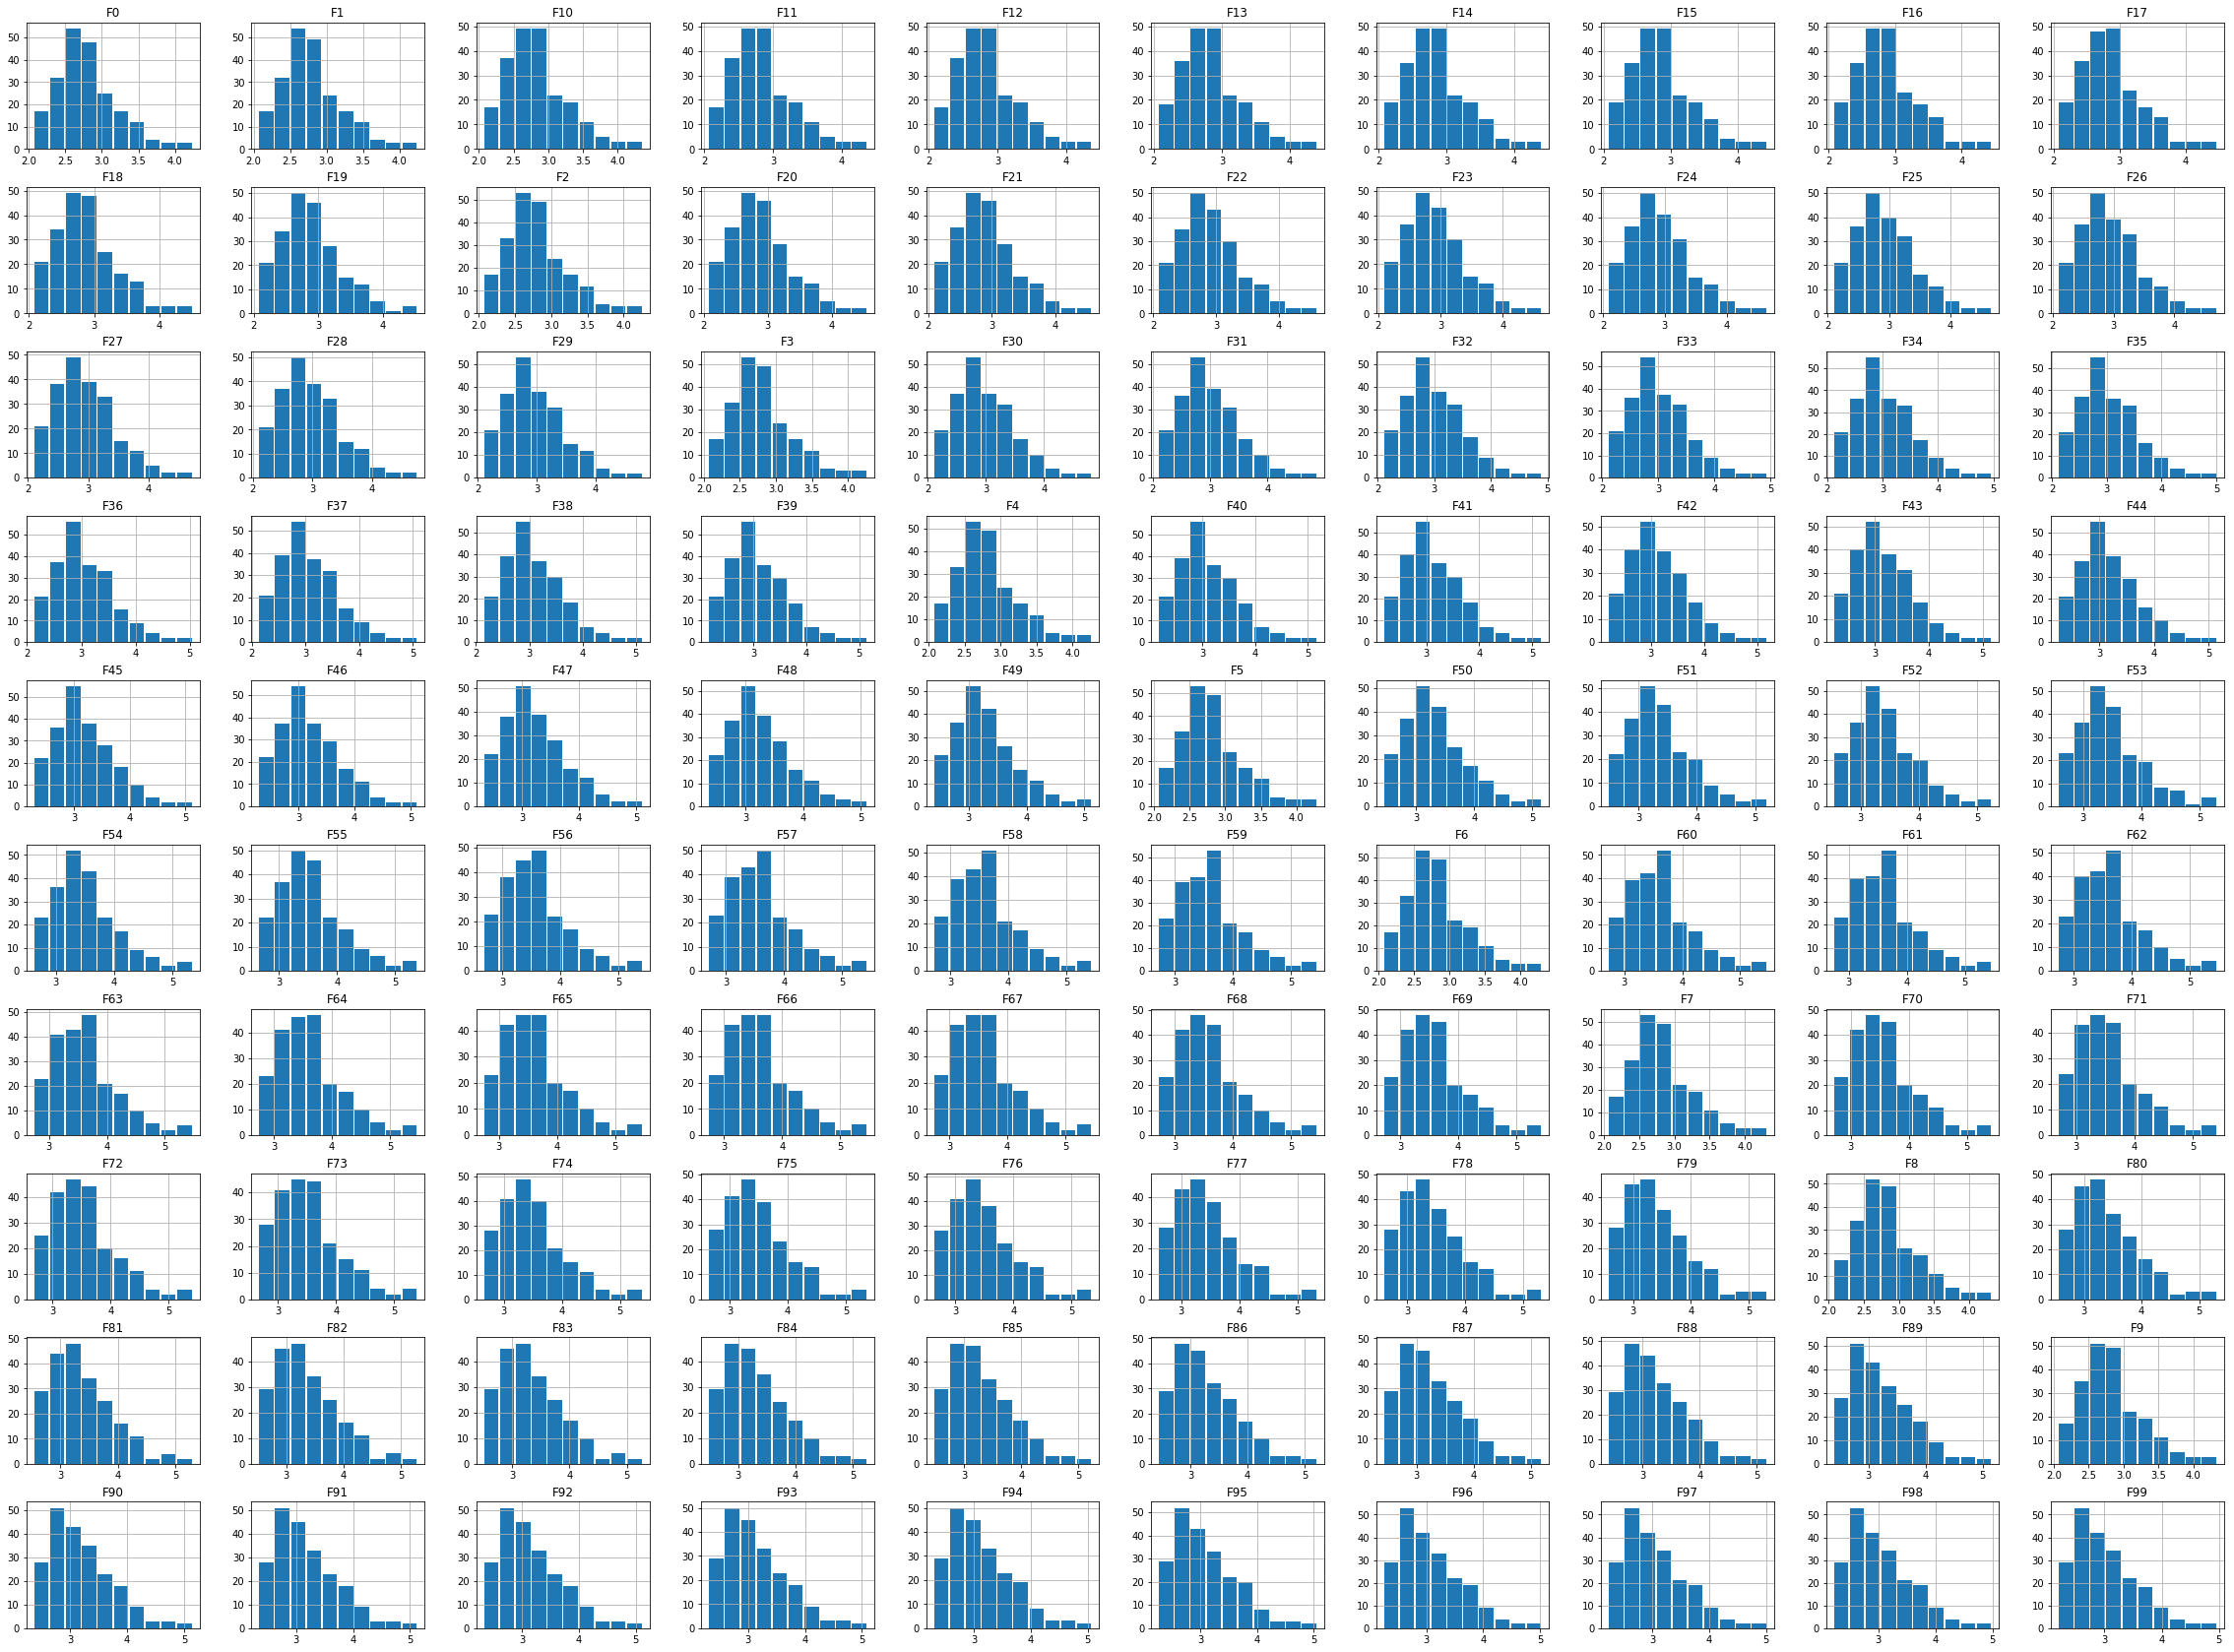

In [38]:
_ = absorp.hist(figsize=(40,30), rwidth=.9)

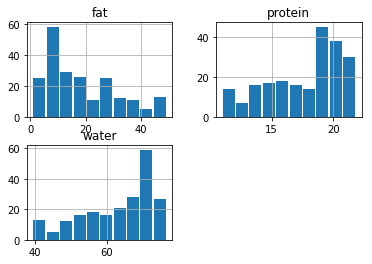

In [42]:
_ = endpoint.hist(rwidth=.9)

In [50]:
sc = StandardScaler()
pca = PCA()

In [51]:
pca.fit(sc.fit_transform(absorp.values))

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
(pca.explained_variance_ratio_ > 1e-5).sum()

6

In [55]:
pd.Series(pca.explained_variance_[:6])

0    99.087063
1     0.974237
2     0.280630
3     0.114965
4     0.006491
5     0.002637
dtype: float64

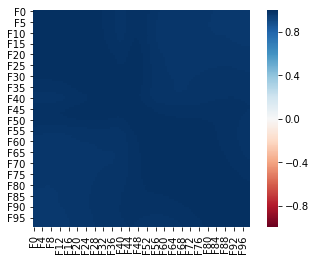

In [202]:
corr = absorp.corr()

sns.heatmap(corr, square=True, annot=False, cmap=plt.cm.RdBu, vmin=-1, vmax=1)

### Train, Validation, Test datasets

In [58]:
X = absorp.values
y = endpoint.iloc[:, -1].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=123)
X_train.shape, X_test.shape

((161, 100), (54, 100))

In [61]:
k10 = KFold(n_splits=10, shuffle=True, random_state=123)

### Baseline LinearRegression

In [66]:
r2_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=k10, scoring='r2')
nmse_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=k10, scoring='neg_mean_squared_error')

In [70]:
print("r2: {:.4f} +/- {:.3f}\nRMSE: {:.4f} +/- {:.3f}".format(r2_scores.mean(), r2_scores.std(),
                                                             np.sqrt(-nmse_scores).mean(), np.sqrt(-nmse_scores).std()))

r2: 0.7667 +/- 0.159
RMSE: 1.2666 +/- 0.440


### PCA + LinearRegression

In [89]:
pca_linreg = make_pipeline(StandardScaler(), PCA(), LinearRegression())

In [91]:
pca_linreg_grid = RandomizedSearchCV(pca_linreg, {"pca__n_components":np.arange(1, 30)}, 
                                     cv=k10, scoring='r2', n_iter=20, n_jobs=-1)
pca_linreg_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'pca__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=0)

In [198]:
pca_linreg_grid.best_score_, pca_linreg_grid.best_params_

(0.93374882965926764, {'pca__n_components': 17})

In [97]:
print_r2_rmse(y_test, pca_linreg_grid.predict(X_test))

R2: 0.9547, RMSE: 0.6319


### PLS

In [100]:
pls_grid = RandomizedSearchCV(PLSRegression(), {"n_components":np.arange(1, 30)}, 
                              n_iter=20, n_jobs=-1, cv=k10, scoring='r2')

pls_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
          error_score='raise',
          estimator=PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06),
          fit_params=None, iid=True, n_iter=20, n_jobs=-1,
          param_distributions={'n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=0)

In [101]:
pls_grid.best_score_, pls_grid.best_params_

(0.93190347084337166, {'n_components': 14})

In [102]:
print_r2_rmse(y_test, pls_grid.predict(X_test))

R2: 0.9523, RMSE: 0.6481


In [63]:
# PLS
# Ridge
# Lasso

### Ridge

In [106]:
ridge_pipe = make_pipeline(StandardScaler(), Ridge())
ridge_grid = RandomizedSearchCV(ridge_pipe, {"ridge__alpha": expon(loc=0, scale=1)}, 
                                cv=k10, n_iter=100, n_jobs=-1, scoring='r2')

In [107]:
ridge_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
          fit_params=None, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'ridge__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd7125282e8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=0)

In [108]:
ridge_grid.best_params_, ridge_grid.best_score_

({'ridge__alpha': 0.0069479266972762117}, 0.87336753648093934)

In [110]:
print_r2_rmse(y_test, ridge_grid.predict(X_test))

R2: 0.8997, RMSE: 0.9400


### PCA + Ridge

In [226]:
pca_ridge_pipe = make_pipeline(StandardScaler(), PCA(), Ridge())
pca_ridge_grid = RandomizedSearchCV(pca_ridge_pipe, 
                                    {'pca__n_components':np.arange(2, 30, 2), 'ridge__alpha':expon(loc=0, scale=1)},
                                   n_jobs=-1, cv=k10, n_iter=200, scoring='r2')

In [227]:
pca_ridge_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=True),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'pca__n_components': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]), 'ridge__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd712891da0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=0)

In [228]:
pca_ridge_grid.best_params_, pca_ridge_grid.best_score_

({'pca__n_components': 14, 'ridge__alpha': 0.0016368332257368982},
 0.89958112464508477)

In [229]:
print_r2_rmse(y_test, pca_ridge_grid.predict(X_test))

R2: 0.9151, RMSE: 0.8649


### Ex 6.2

In [210]:
fingerprint = pd.read_csv('data/permeability/fingerprints.csv', index_col=0)
permeability = pd.read_csv('data/permeability/permeability.csv', index_col=0)

In [208]:
fingerprint.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1098,X1099,X1100,X1101,X1102,X1103,X1104,X1105,X1106,X1107
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [209]:
fingerprint.shape

(165, 1107)

In [215]:
fingerprint.isnull().sum().sum()

0

In [212]:
permeability.head(), permeability.shape

(   permeability
 1        12.520
 2         1.120
 3        19.405
 4         1.730
 5         1.680, (165, 1))

In [214]:
fingerprint.nunique().describe()

count    1107.000000
mean        1.965673
std         0.182150
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
dtype: float64

In [218]:
fingerprint.shape

(165, 1107)

In [219]:
vt0 = VarianceThreshold()
vt0.fit_transform(fingerprint).shape

(165, 1069)

In [220]:
vt001 = VarianceThreshold(0.01)
vt001.fit_transform(fingerprint).shape

(165, 773)

In [221]:
vt005 = VarianceThreshold(0.05)
vt005.fit_transform(fingerprint).shape

(165, 388)

In [241]:
X = vt005.transform(fingerprint)
X.shape

(165, 388)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7105c94a8>]], dtype=object)

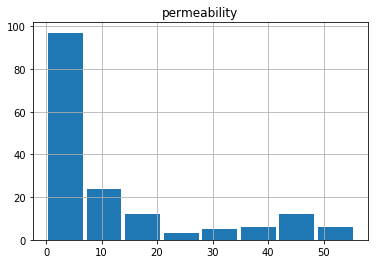

In [240]:
permeability.hist(rwidth=.9, bins=8)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd71283df98>]], dtype=object)

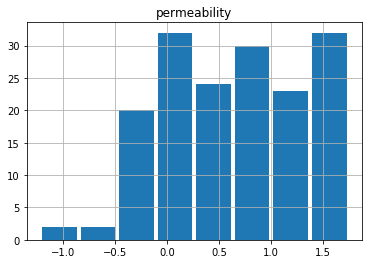

In [239]:
permeability.apply(np.log10).hist(rwidth=.9, bins=8)

In [274]:
y_log = np.log10(permeability)
y_log.shape

(165, 1)

In [334]:
X_train, X_test, y_log_train, y_log_test = train_test_split(X, y_log, test_size=.25, random_state=123)

In [335]:
X_train.shape, X_test.shape

((123, 388), (42, 388))

In [336]:
k10 = KFold(n_splits=10, shuffle=False, random_state=123)
loo = LeaveOneOut()

In [337]:
sc_pls = make_pipeline(PLSRegression(scale=False))
pls_grid = RandomizedSearchCV(sc_pls, {'plsregression__n_components': np.arange(1, 20)}, 
                              n_iter=18, n_jobs=-1, cv=k10, scoring='r2')

In [338]:
pls_grid.fit(X_train, y_log_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=False),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('plsregression', PLSRegression(copy=True, max_iter=500, n_components=2, scale=False, tol=1e-06))]),
          fit_params=None, iid=True, n_iter=18, n_jobs=-1,
          param_distributions={'plsregression__n_components': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=0)

In [339]:
pls_grid.best_params_, pls_grid.best_score_

({'plsregression__n_components': 10}, 0.37377732818923215)

In [340]:
r2_score(y_log_test, pls_grid.predict(X_test))

0.30328243027259794

Text(0,0.5,'R2')

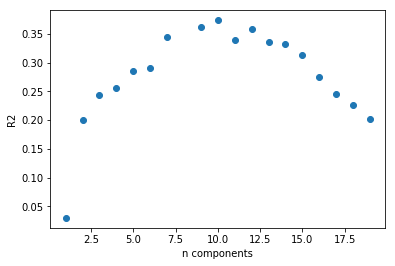

In [341]:
xs = np.array(pls_grid.cv_results_['param_plsregression__n_components'], dtype=int)
ys = pls_grid.cv_results_['mean_test_score']

plt.figure(figsize=(6, 4))
plt.plot(xs, ys, 'o')
plt.xlabel('n components')
plt.ylabel('R2')

Text(0.5,0,'log10(observed)')

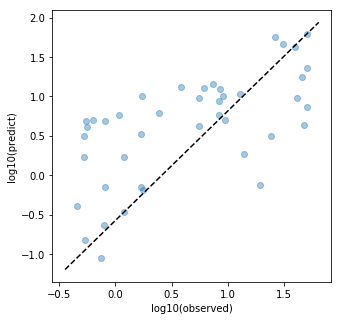

In [342]:
plt.figure(figsize=(5, 5))
plt.plot(y_log_test, pls_grid.predict(X_test), 'o', alpha=.4)
plt.plot(plt.gca().get_xlim(), plt.gca().get_ylim(), linestyle='--', color='k')
plt.ylabel('log10(predict)')
plt.xlabel('log10(observed)')

Text(0,0.5,'residuals')

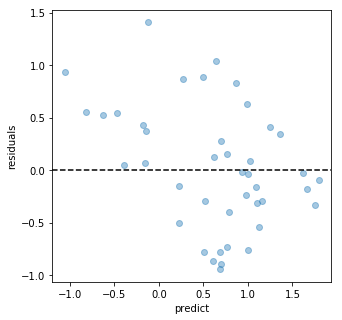

In [343]:
res = y_log_test - pls_grid.predict(X_test)

plt.figure(figsize=(5, 5))
plt.plot(pls_grid.predict(X_test), res, 'o', alpha=.4)
plt.axhline(0, linestyle='--', color='k')
plt.xlabel('predict')
plt.ylabel('residuals')

In [359]:
ridge_pipe = make_pipeline(StandardScaler(), Ridge(normalize=True))
ridge_grid = RandomizedSearchCV(ridge_pipe, 
                                {'ridge__alpha': expon(0, 2)}, n_iter=200, n_jobs=-1, cv=k10, scoring='r2')
ridge_grid.fit(X_train, y_log_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=123, shuffle=False),
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001))]),
          fit_params=None, iid=True, n_iter=200, n_jobs=-1,
          param_distributions={'ridge__alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fd71455f630>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=0)

In [360]:
ridge_grid.best_params_, ridge_grid.best_score_

({'ridge__alpha': 0.4410791603905444}, 0.37747300152222135)

In [361]:
r2_score(y_log_test, ridge_grid.predict(X_test))

0.32887211552425699

### Ex 6.3

In [364]:
chem = pd.read_csv('data/ChemicalManufacturingProcess/ChemicalManufacturingProcess.csv', index_col=0)

In [365]:
chem.head()

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
1,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3.0,7.2,NaN,NaN,11.6,3.0,1.8,2.4
2,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2.0,7.2,0.1,0.15,11.1,0.9,1.9,2.2
3,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2.0,7.2,0.0,0.00,12.0,1.0,1.8,2.3
4,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2.0,7.2,0.0,0.00,10.6,1.1,1.8,2.1
5,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2.0,7.3,0.0,0.00,11.0,1.1,1.7,2.1


In [366]:
chem.shape

(176, 58)

In [367]:
chem.nunique()

Yield                     150
BiologicalMaterial01       89
BiologicalMaterial02      106
BiologicalMaterial03      101
BiologicalMaterial04      102
BiologicalMaterial05      103
BiologicalMaterial06      105
BiologicalMaterial07        2
BiologicalMaterial08       90
BiologicalMaterial09       79
BiologicalMaterial10       79
BiologicalMaterial11      105
BiologicalMaterial12       87
ManufacturingProcess01     41
ManufacturingProcess02     27
ManufacturingProcess03     14
ManufacturingProcess04     28
ManufacturingProcess05    154
ManufacturingProcess06     40
ManufacturingProcess07      2
ManufacturingProcess08      2
ManufacturingProcess09    148
ManufacturingProcess10     36
ManufacturingProcess11     35
ManufacturingProcess12      2
ManufacturingProcess13     42
ManufacturingProcess14    114
ManufacturingProcess15    119
ManufacturingProcess16    120
ManufacturingProcess17     42
ManufacturingProcess18    106
ManufacturingProcess19    112
ManufacturingProcess20    112
Manufactur

In [393]:
chem.isnull().sum().sum() / np.prod(chem.shape) * 100

1.0384012539184952

In [373]:
mat_cols = chem.columns[chem.columns.str.contains('Material')]
proc_cols = chem.columns[chem.columns.str.contains('Process')]

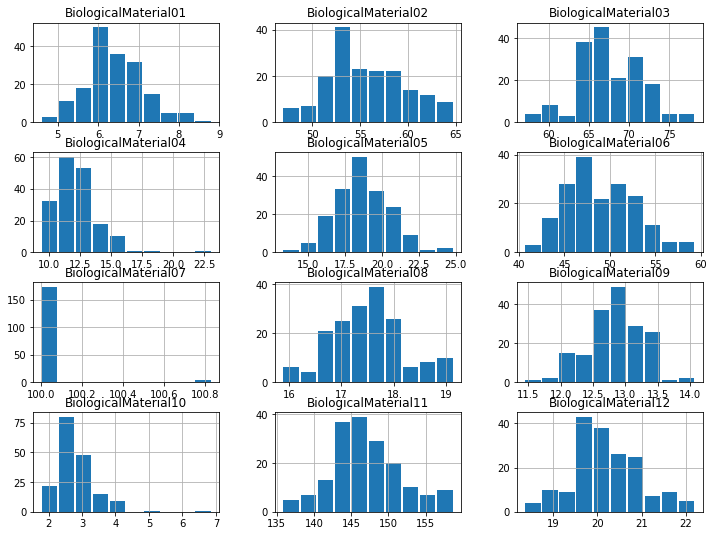

In [377]:
_ = chem[mat_cols].hist(figsize=(12, 9), rwidth=.9)

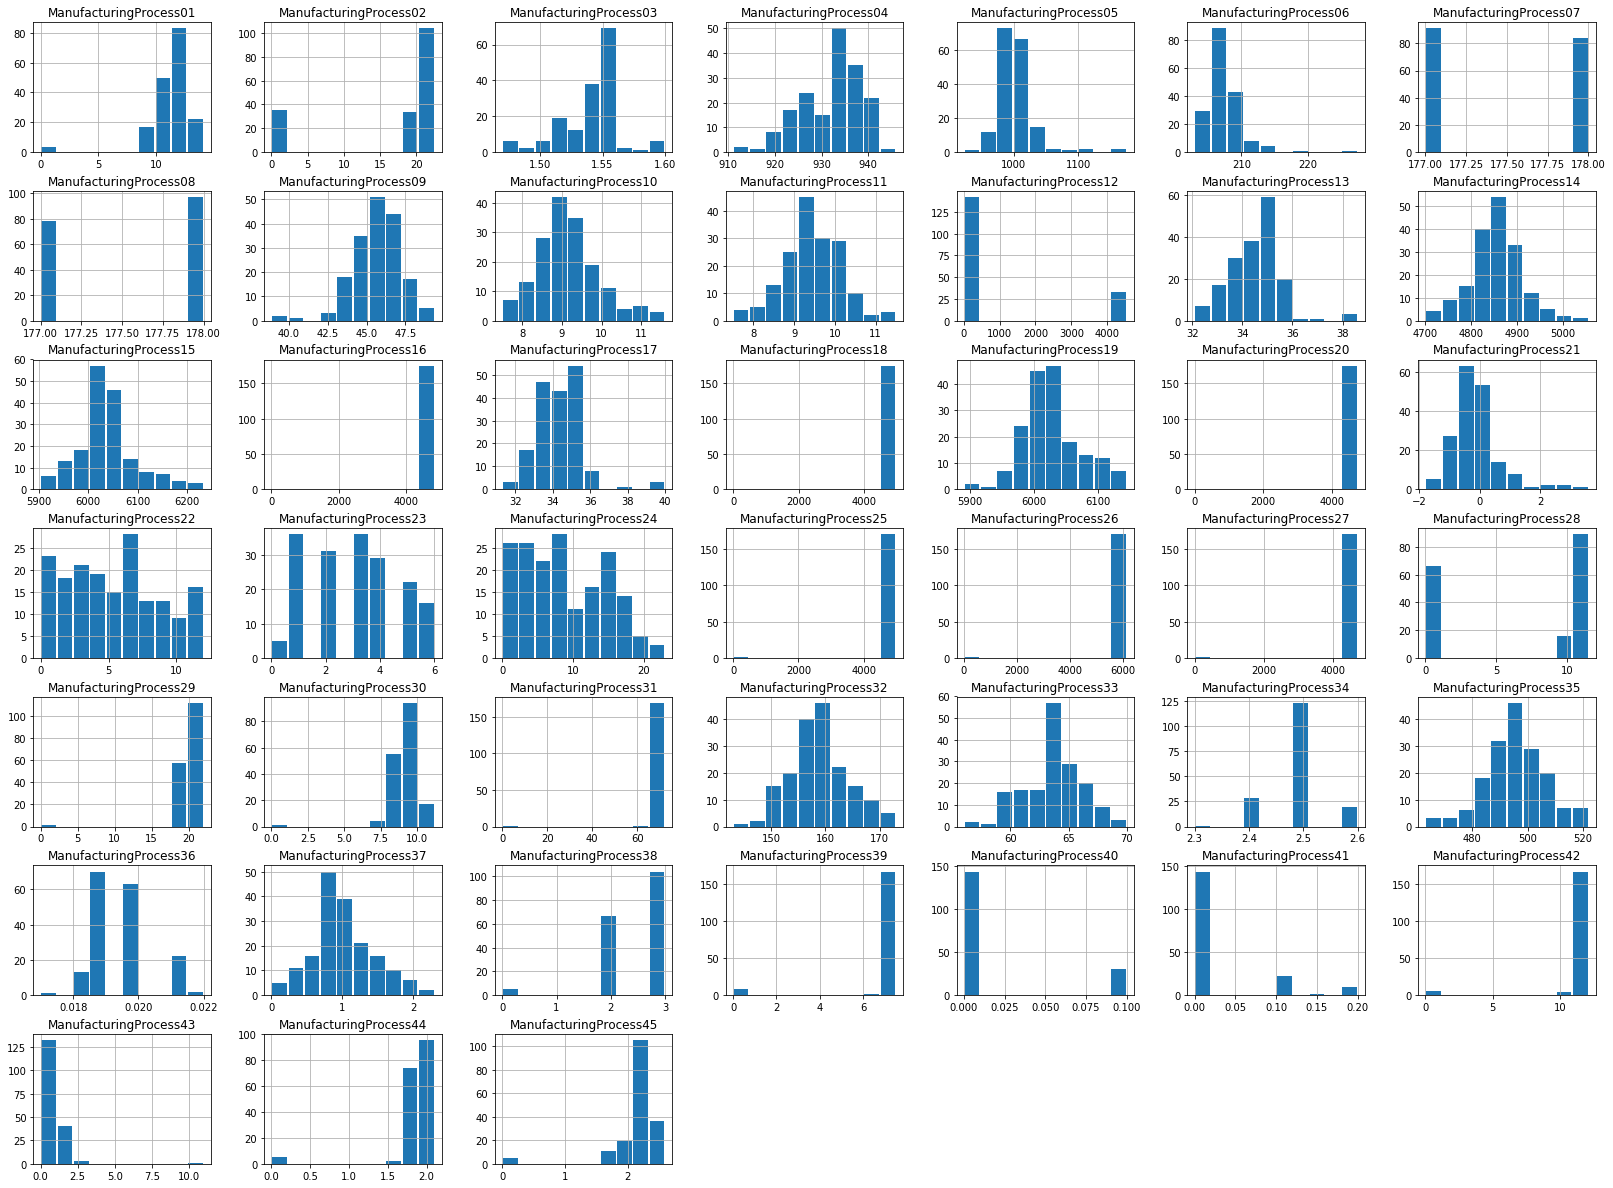

In [381]:
_ = chem[proc_cols].hist(figsize=(28, 21), rwidth=.9)

In [383]:
chem.apply(np.var).round(2)

Yield                           3.39
BiologicalMaterial01            0.51
BiologicalMaterial02           16.19
BiologicalMaterial03           15.92
BiologicalMaterial04            3.13
BiologicalMaterial05            3.38
BiologicalMaterial06           13.95
BiologicalMaterial07            0.01
BiologicalMaterial08            0.46
BiologicalMaterial09            0.17
BiologicalMaterial10            0.36
BiologicalMaterial11           23.10
BiologicalMaterial12            0.59
ManufacturingProcess01          3.30
ManufacturingProcess02         71.35
ManufacturingProcess03          0.00
ManufacturingProcess04         39.14
ManufacturingProcess05        926.59
ManufacturingProcess06          7.24
ManufacturingProcess07          0.25
ManufacturingProcess08          0.25
ManufacturingProcess09          2.38
ManufacturingProcess10          0.58
ManufacturingProcess11          0.51
ManufacturingProcess12    3166343.74
ManufacturingProcess13          1.02
ManufacturingProcess14       2955.84
M

In [384]:
chem.ManufacturingProcess25.describe()

count     171.000000
mean     4828.175439
std       373.481087
min         0.000000
25%      4832.000000
50%      4855.000000
75%      4877.000000
max      4990.000000
Name: ManufacturingProcess25, dtype: float64

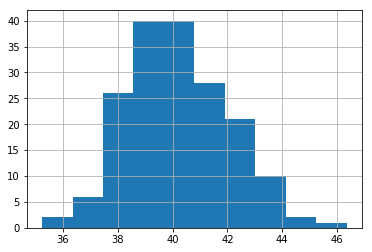

In [385]:
chem.Yield.hist()

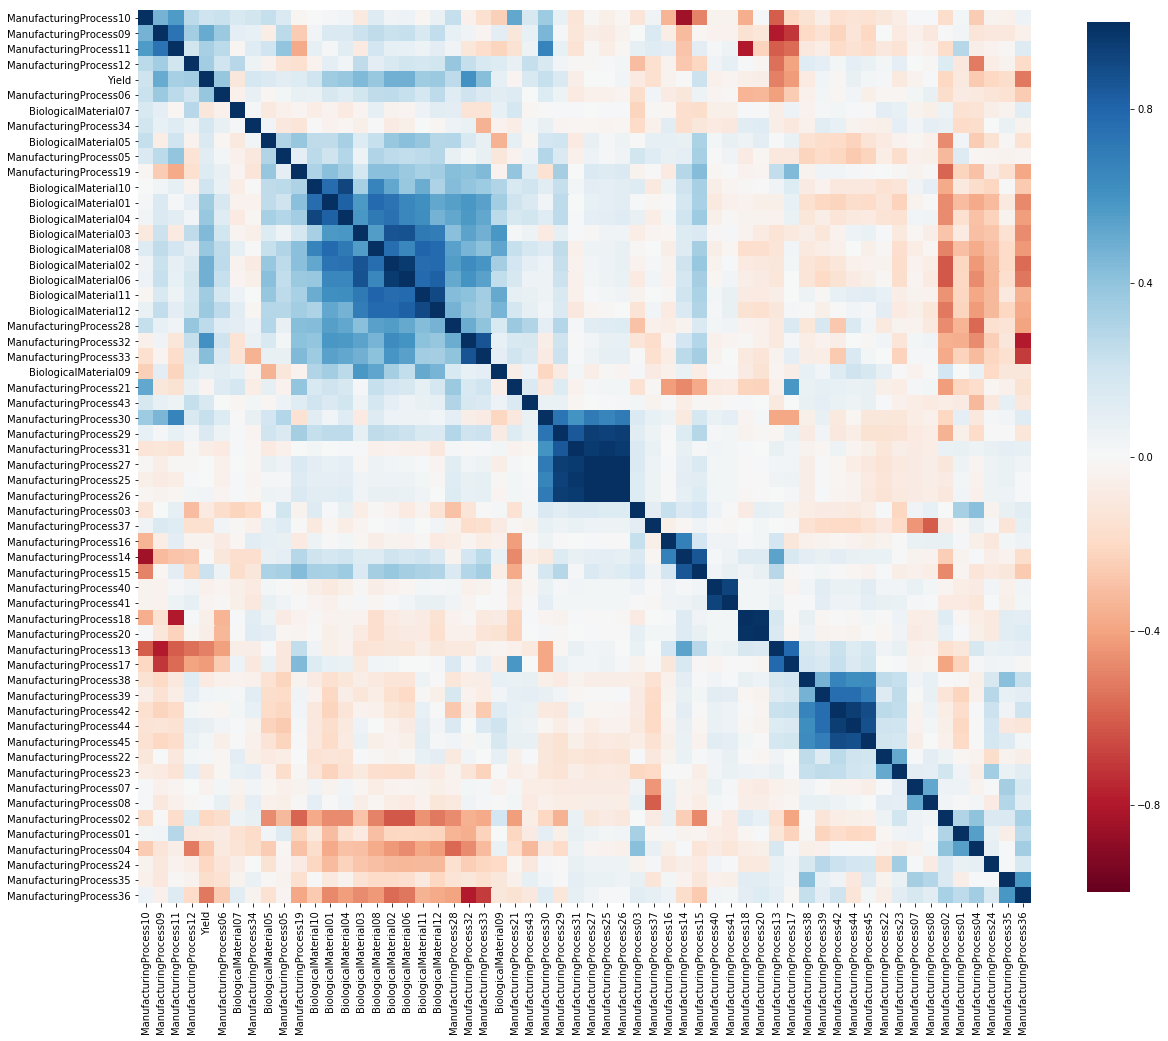

In [389]:
corr = chem.corr()

Y = linkage(corr, method='complete', metric='correlation')
Z = dendrogram(Y, no_plot=True)['leaves']
corr = corr.iloc[:, Z]
corr = corr.iloc[Z, :]

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, square=True, annot=False, cmap=plt.cm.RdBu, vmin=-1, vmax=1, 
            xticklabels=True, yticklabels=True, ax=ax, cbar_kws={'shrink':.8})

In [391]:
corr['Yield'].sort_values()

ManufacturingProcess36   -0.528420
ManufacturingProcess13   -0.503680
ManufacturingProcess17   -0.425807
ManufacturingProcess04   -0.263550
ManufacturingProcess24   -0.210200
ManufacturingProcess02   -0.206276
ManufacturingProcess35   -0.174233
ManufacturingProcess37   -0.159314
BiologicalMaterial07     -0.111850
ManufacturingProcess01   -0.101343
ManufacturingProcess23   -0.096880
ManufacturingProcess03   -0.091007
ManufacturingProcess38   -0.086459
ManufacturingProcess31   -0.068904
ManufacturingProcess20   -0.065511
ManufacturingProcess18   -0.058929
ManufacturingProcess40   -0.046964
ManufacturingProcess07   -0.043327
ManufacturingProcess16   -0.037346
ManufacturingProcess41   -0.028799
ManufacturingProcess21   -0.025850
ManufacturingProcess42   -0.013497
ManufacturingProcess14   -0.005948
ManufacturingProcess27    0.001659
ManufacturingProcess25    0.007276
ManufacturingProcess08    0.014695
ManufacturingProcess22    0.016972
ManufacturingProcess45    0.028816
ManufacturingProcess

In [405]:
miss_cols = chem.columns[chem.isnull().sum() > 0]
len(miss_cols)

28

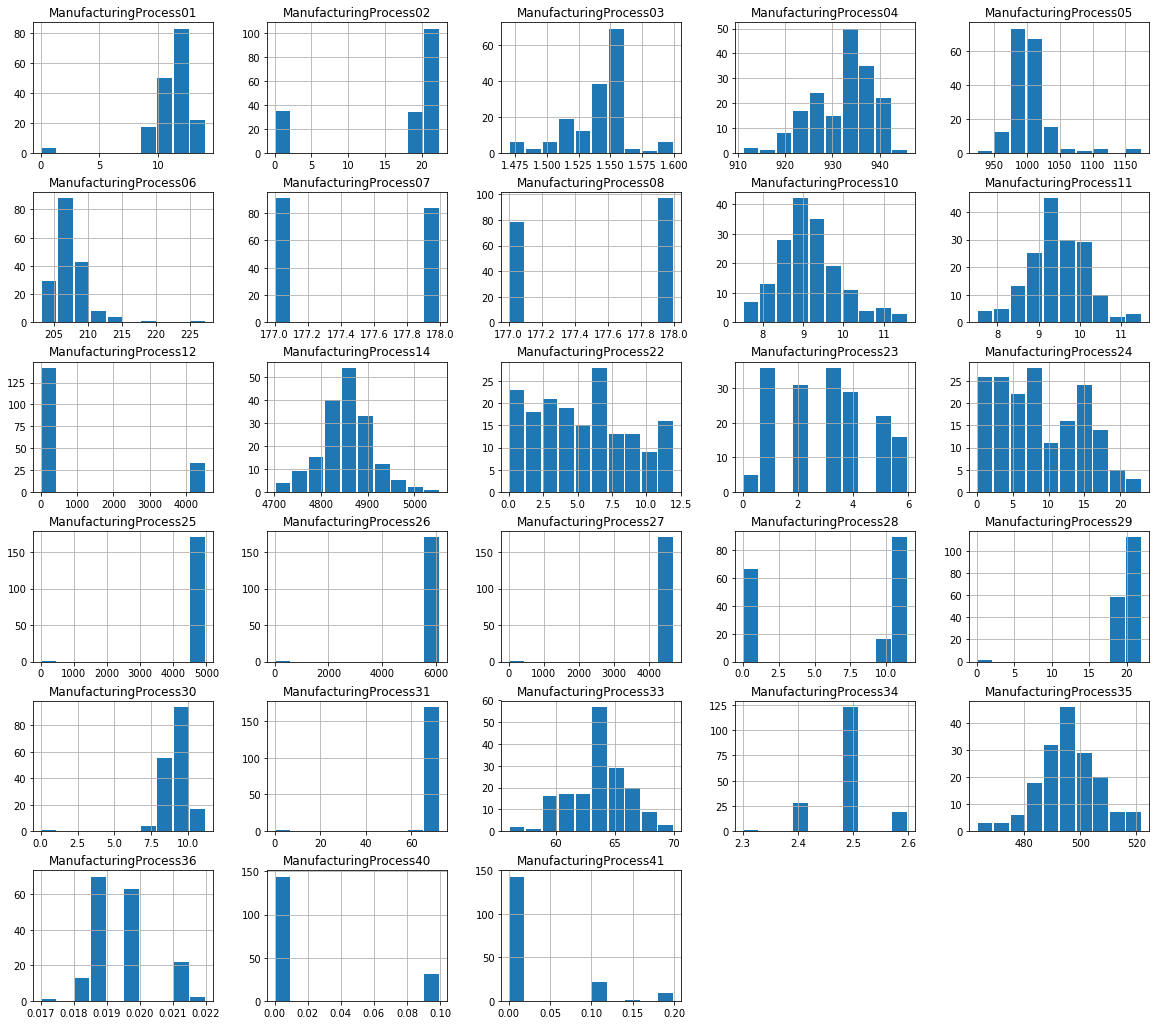

In [406]:
_ = chem[miss_cols].hist(rwidth=.9, figsize=(20, 18))

In [407]:
chem.isnull().sum().sum()

106

In [409]:
chem.isnull().sum().sort_values(ascending=False)[:10]

ManufacturingProcess03    15
ManufacturingProcess11    10
ManufacturingProcess10     9
ManufacturingProcess25     5
ManufacturingProcess33     5
ManufacturingProcess26     5
ManufacturingProcess27     5
ManufacturingProcess28     5
ManufacturingProcess29     5
ManufacturingProcess30     5
dtype: int64

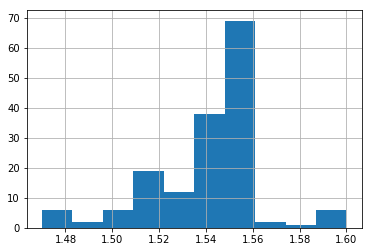

In [410]:
chem.ManufacturingProcess03.hist()

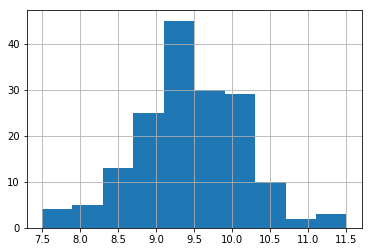

In [412]:
chem.ManufacturingProcess11.hist()

In [413]:
chem.isnull().sum(axis=1).sort_values(ascending=False)[:10]

1      16
172    11
175    11
176    11
173    11
174    11
23      4
2       3
3       3
4       3
dtype: int64

In [416]:
skew_cols = chem.columns[chem.apply(skew).abs() > .5]

In [417]:
chem[skew_cols].min()

BiologicalMaterial04         9.38
BiologicalMaterial07       100.00
BiologicalMaterial10         1.77
ManufacturingProcess09      38.89
ManufacturingProcess15    5904.00
ManufacturingProcess16       0.00
ManufacturingProcess17      31.30
ManufacturingProcess18       0.00
ManufacturingProcess20       0.00
ManufacturingProcess21      -1.80
ManufacturingProcess38       0.00
ManufacturingProcess39       0.00
ManufacturingProcess42       0.00
ManufacturingProcess43       0.00
ManufacturingProcess44       0.00
ManufacturingProcess45       0.00
dtype: float64

In [445]:
num_cols = chem.columns[chem.nunique() > 5]

skew_cols = num_cols & skew_cols

non_skew_cols = X.columns ^ skew_cols

non_skew_map = DataFrameMapper(gen_features(non_skew_cols, classes=[None]), input_df=True, default=False)

In [576]:
class BoxCox(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        x_min = X.min()
        if x_min < 0:
            self.shift_ = abs(x_min) + 1
        else:
            self.shift_ = 1
        
        _, self.lam_ = boxcox(X + self.shift_)
        return self
    
    def transform(self, X):
        return boxcox(X + self.shift_, lmbda=self.lam_)
    
class MnMx(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        xmin, xmax = X.min(), X.max()
        self.range_ = xmax - xmin
        self.xmin_ = xmin
        return self
    
    def transform(self, X):
        return (X - self.xmin_) / self.range_

In [577]:
bx_transform = DataFrameMapper(gen_features(skew_cols, classes=[BoxCox]), 
                               df_out=True, input_df=True, default=False)

bx_pipe = make_pipeline(bx_transform, Imputer(strategy='median'), StandardScaler())
non_bx_pipe = make_pipeline(non_skew_map, Imputer(strategy='median'), VarianceThreshold(0.05))

In [578]:
preprocess_pipe = make_union(bx_pipe, non_bx_pipe)

In [579]:
X = chem.drop('Yield', axis=1)
y = chem.Yield.values

X.shape, y.shape

((176, 57), (176,))

In [580]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [586]:
cv = RepeatedKFold(n_repeats=25, n_splits=10, random_state=123)

In [587]:
model_pipe = make_pipeline(preprocess_pipe, PLSRegression())
model_grid = RandomizedSearchCV(model_pipe, {"plsregression__n_components": np.arange(2, 10)}, 
                                n_iter=5, n_jobs=1, cv=cv, scoring='r2')

In [588]:
model_grid.fit(X_train, y_train)

/home/pongsakorn/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/stats/morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
/home/pongsakorn/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/optimize/optimize.py:1851: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/pongsakorn/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/optimize/optimize.py:1852: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = 2.0 * (tmp2 - tmp1)
/home/pongsakorn/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/optimize/optimize.py:1850: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/pongsakorn/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/optimize/optimize.py:1849: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
/home/pongsakorn/anaconda3/envs/py

RandomizedSearchCV(cv=<sklearn.model_selection._split.RepeatedKFold object at 0x7fd705b28518>,
          error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('pipeline-1', Pipeline(memory=None,
     steps=[('dataframemapper', DataFrameMapper(default=False, df_out=True,
        features=[('BiologicalMaterial04', [BoxCox()]), ('BiologicalMaterial10', [BoxCox()]), ('ManufacturingProces...), ('plsregression', PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06))]),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'plsregression__n_components': array([2, 3, 4, 5, 6, 7, 8, 9])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='r2', verbose=0)

In [589]:
model_grid.best_params_, model_grid.best_score_

({'plsregression__n_components': 2}, -1.4875655323503658)

In [591]:
scores = cross_val_score(RandomForestRegressor(), X_train.fillna(-999), y_train, cv=cv, n_jobs=-1, scoring='r2')

In [592]:
scores.mean()

0.43095686811272743

In [593]:
rf = RandomForestRegressor().fit(X_train.fillna(-999), y_train)

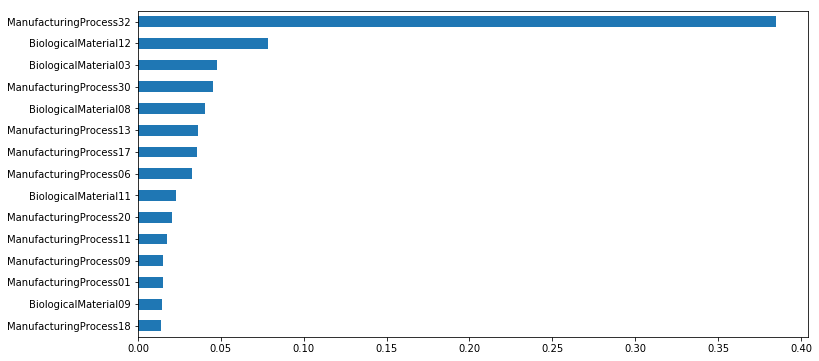

In [598]:
pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=True)[-15:].plot.barh(figsize=(12, 6))

In [599]:
from scipy.sparse import coo_matrix

In [ ]:
np.multiply()